In [1]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora

from gensim.models import CoherenceModel
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')



# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/gensim/similarities/__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import xlrd
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.parsing.preprocessing import preprocess_string, strip_punctuation, strip_numeric
import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel
import nltk

In [3]:
#!pip install xlrd

In [4]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/chenzhou/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
from nltk.corpus import stopwords
stop= stopwords.words('english')
stop.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

In [6]:
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
def clean(doc):
    if doc is not None:
      stop_free = " ".join([i for i in str(doc).lower().split() if i not in stop])
      punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
      normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
      return normalized
    else:
      return doc

In [7]:


file_path = ("capstone dataset.xlsx")
data = pd.read_excel(file_path, sheet_name='Not electricians')

In [8]:
data['DESCRIPTION'].isnull().value_counts()

False    457
True       7
Name: DESCRIPTION, dtype: int64

In [9]:
data.DESCRIPTION.dropna()

0      I'am a professional in late 20's with 7 years ...
1      We are professional removalists dedicated for ...
2      Structural engineer , Removal work and online ...
3      After 1 full year and 500 plus 5 star reviews ...
4                       Car repair, service and diagnose
                             ...                        
459    I'm a reliable man with a toyota van ready to ...
460    " I have been in the Tiling for over 12years a...
461       Professional industraial and domestic Cleaner.
462    S&J Construction Group Are Kilsyth Based const...
463    WE SPECIALISE IN A WIDE RANGE OF BOAT REPAIRS,...
Name: DESCRIPTION, Length: 457, dtype: object

In [10]:
data[(data.DESCRIPTION == ' ')].index.tolist()

[]

# Tokenize Sentences and Clean

In [12]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent) 

In [27]:
data_list = data.DESCRIPTION.values.tolist()


/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
electric_data = data['DESCRIPTION']
doc_clean = [clean(doc).split() for doc in electric_data] 
dictionary = corpora.Dictionary(doc_clean) 
corpus = [dictionary.doc2bow(doc) for doc in doc_clean]

In [15]:
base_model_lda = gensim.models.ldamodel.LdaModel
ldamodel = gensim.models.ldamodel.LdaModel(corpus = corpus, 
                          id2word = dictionary,
                          num_topics = 4,
                          passes = 50)

In [16]:
ldamodel[corpus]

create four topics for lda model

In [17]:
pprint(ldamodel.print_topics())

[(0,
  '0.013*"job" + 0.011*"work" + 0.010*"removal" + 0.009*"im" + 0.009*"service" '
  '+ 0.008*"year" + 0.006*"experience" + 0.006*"business" + 0.006*"gardening" '
  '+ 0.006*"task"'),
 (1,
  '0.030*"cleaning" + 0.011*"service" + 0.008*"year" + 0.007*"professional" + '
  '0.006*"experience" + 0.006*"provide" + 0.006*"best" + 0.006*"end" + '
  '0.006*"business" + 0.005*"lease"'),
 (2,
  '0.010*"job" + 0.008*"furniture" + 0.007*"service" + 0.007*"year" + '
  '0.007*"work" + 0.007*"experience" + 0.006*"task" + 0.005*"move" + '
  '0.004*"reliable" + 0.004*"man"'),
 (3,
  '0.009*"experience" + 0.007*"boat" + 0.006*"business" + 0.005*"work" + '
  '0.005*"service" + 0.005*"year" + 0.004*"range" + 0.004*"car" + '
  '0.003*"repair" + 0.003*"day"')]


In [18]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamodel, corpus=corpus, texts=doc_clean)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.9476,"cleaning, service, year, professional, experie...","[iam, professional, late, 20, 7, year, plus, e..."
1,1,2.0,0.9830,"job, furniture, service, year, work, experienc...","[professional, removalists, dedicated, task, l..."
2,2,0.0,0.9837,"job, work, removal, im, service, year, experie...","[structural, engineer, removal, work, online, ..."
3,3,3.0,0.5199,"experience, boat, business, work, service, yea...","[1, full, year, 500, plus, 5, star, review, wo..."
4,4,3.0,0.8420,"experience, boat, business, work, service, yea...","[car, repair, service, diagnose]"
5,5,2.0,0.9898,"job, furniture, service, year, work, experienc...","[call0140, click, revealopen, 7, days7am, 9pma..."
6,6,2.0,0.8433,"job, furniture, service, year, work, experienc...","[reliable, service, affordable, price]"
7,7,3.0,0.9916,"experience, boat, business, work, service, yea...","[stop, paying, exorbitant, dealer, charge, usu..."
8,8,3.0,0.9906,"experience, boat, business, work, service, yea...","[mini, excavator, hire, bendigo, regionthis, 1..."
9,9,0.0,0.4900,"job, work, removal, im, service, year, experie...","[beat, anyone‚s, quote, price, sameday, quote,..."


 In LDA models, each document is composed of multiple topics. But, typically only one of the topics is dominant. The below code extracts this dominant topic for each sentence and shows the weight of the topic and the keywords in a nicely formatted output.

# Frequency Distribution of Word Counts in Documents

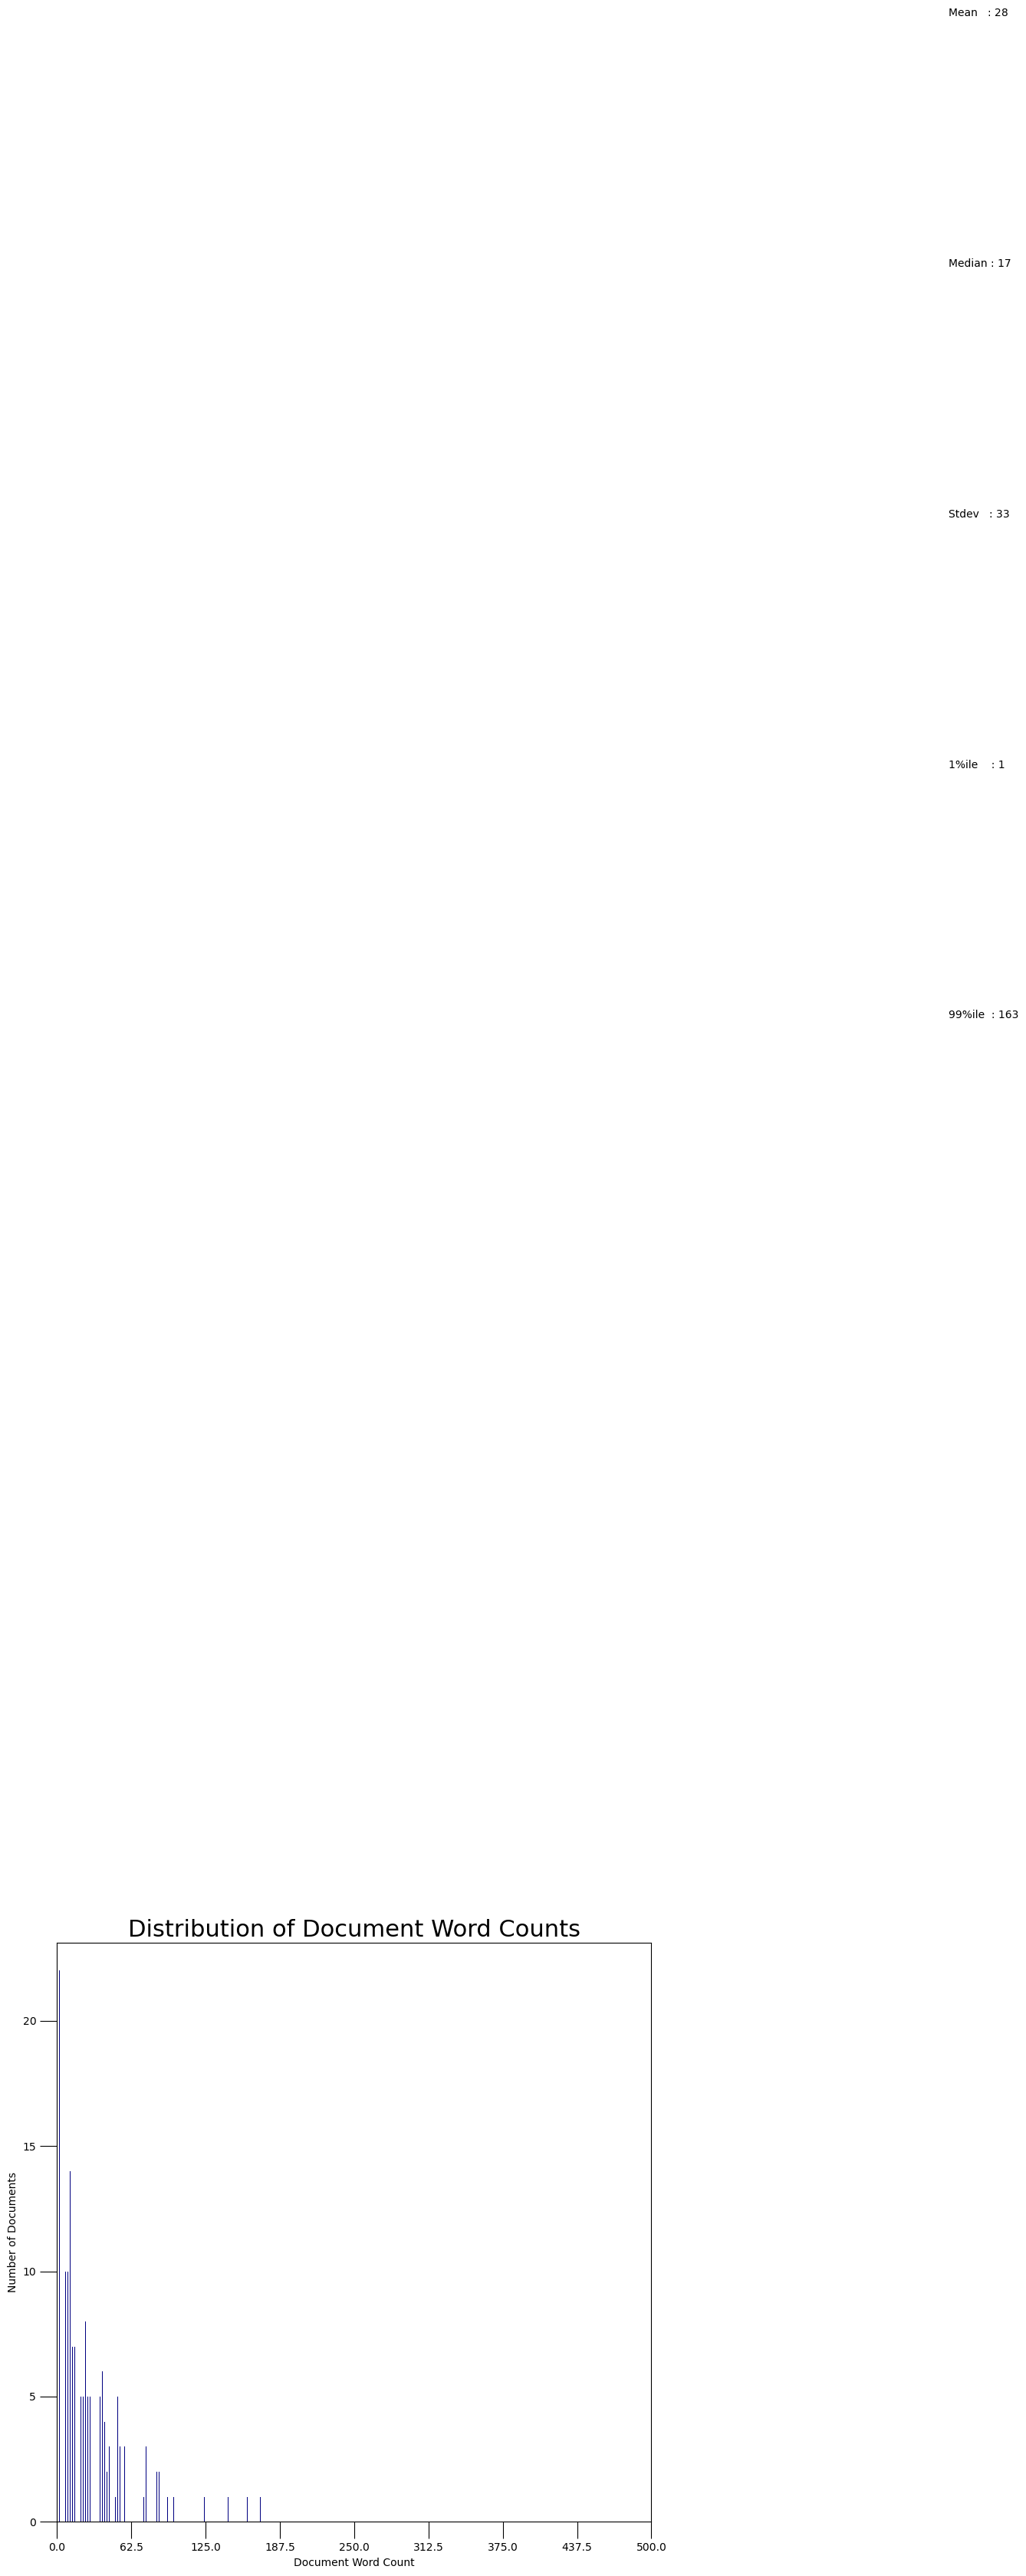

In [19]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,10), dpi=100)
plt.hist(doc_lens, bins = 1000, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,500,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

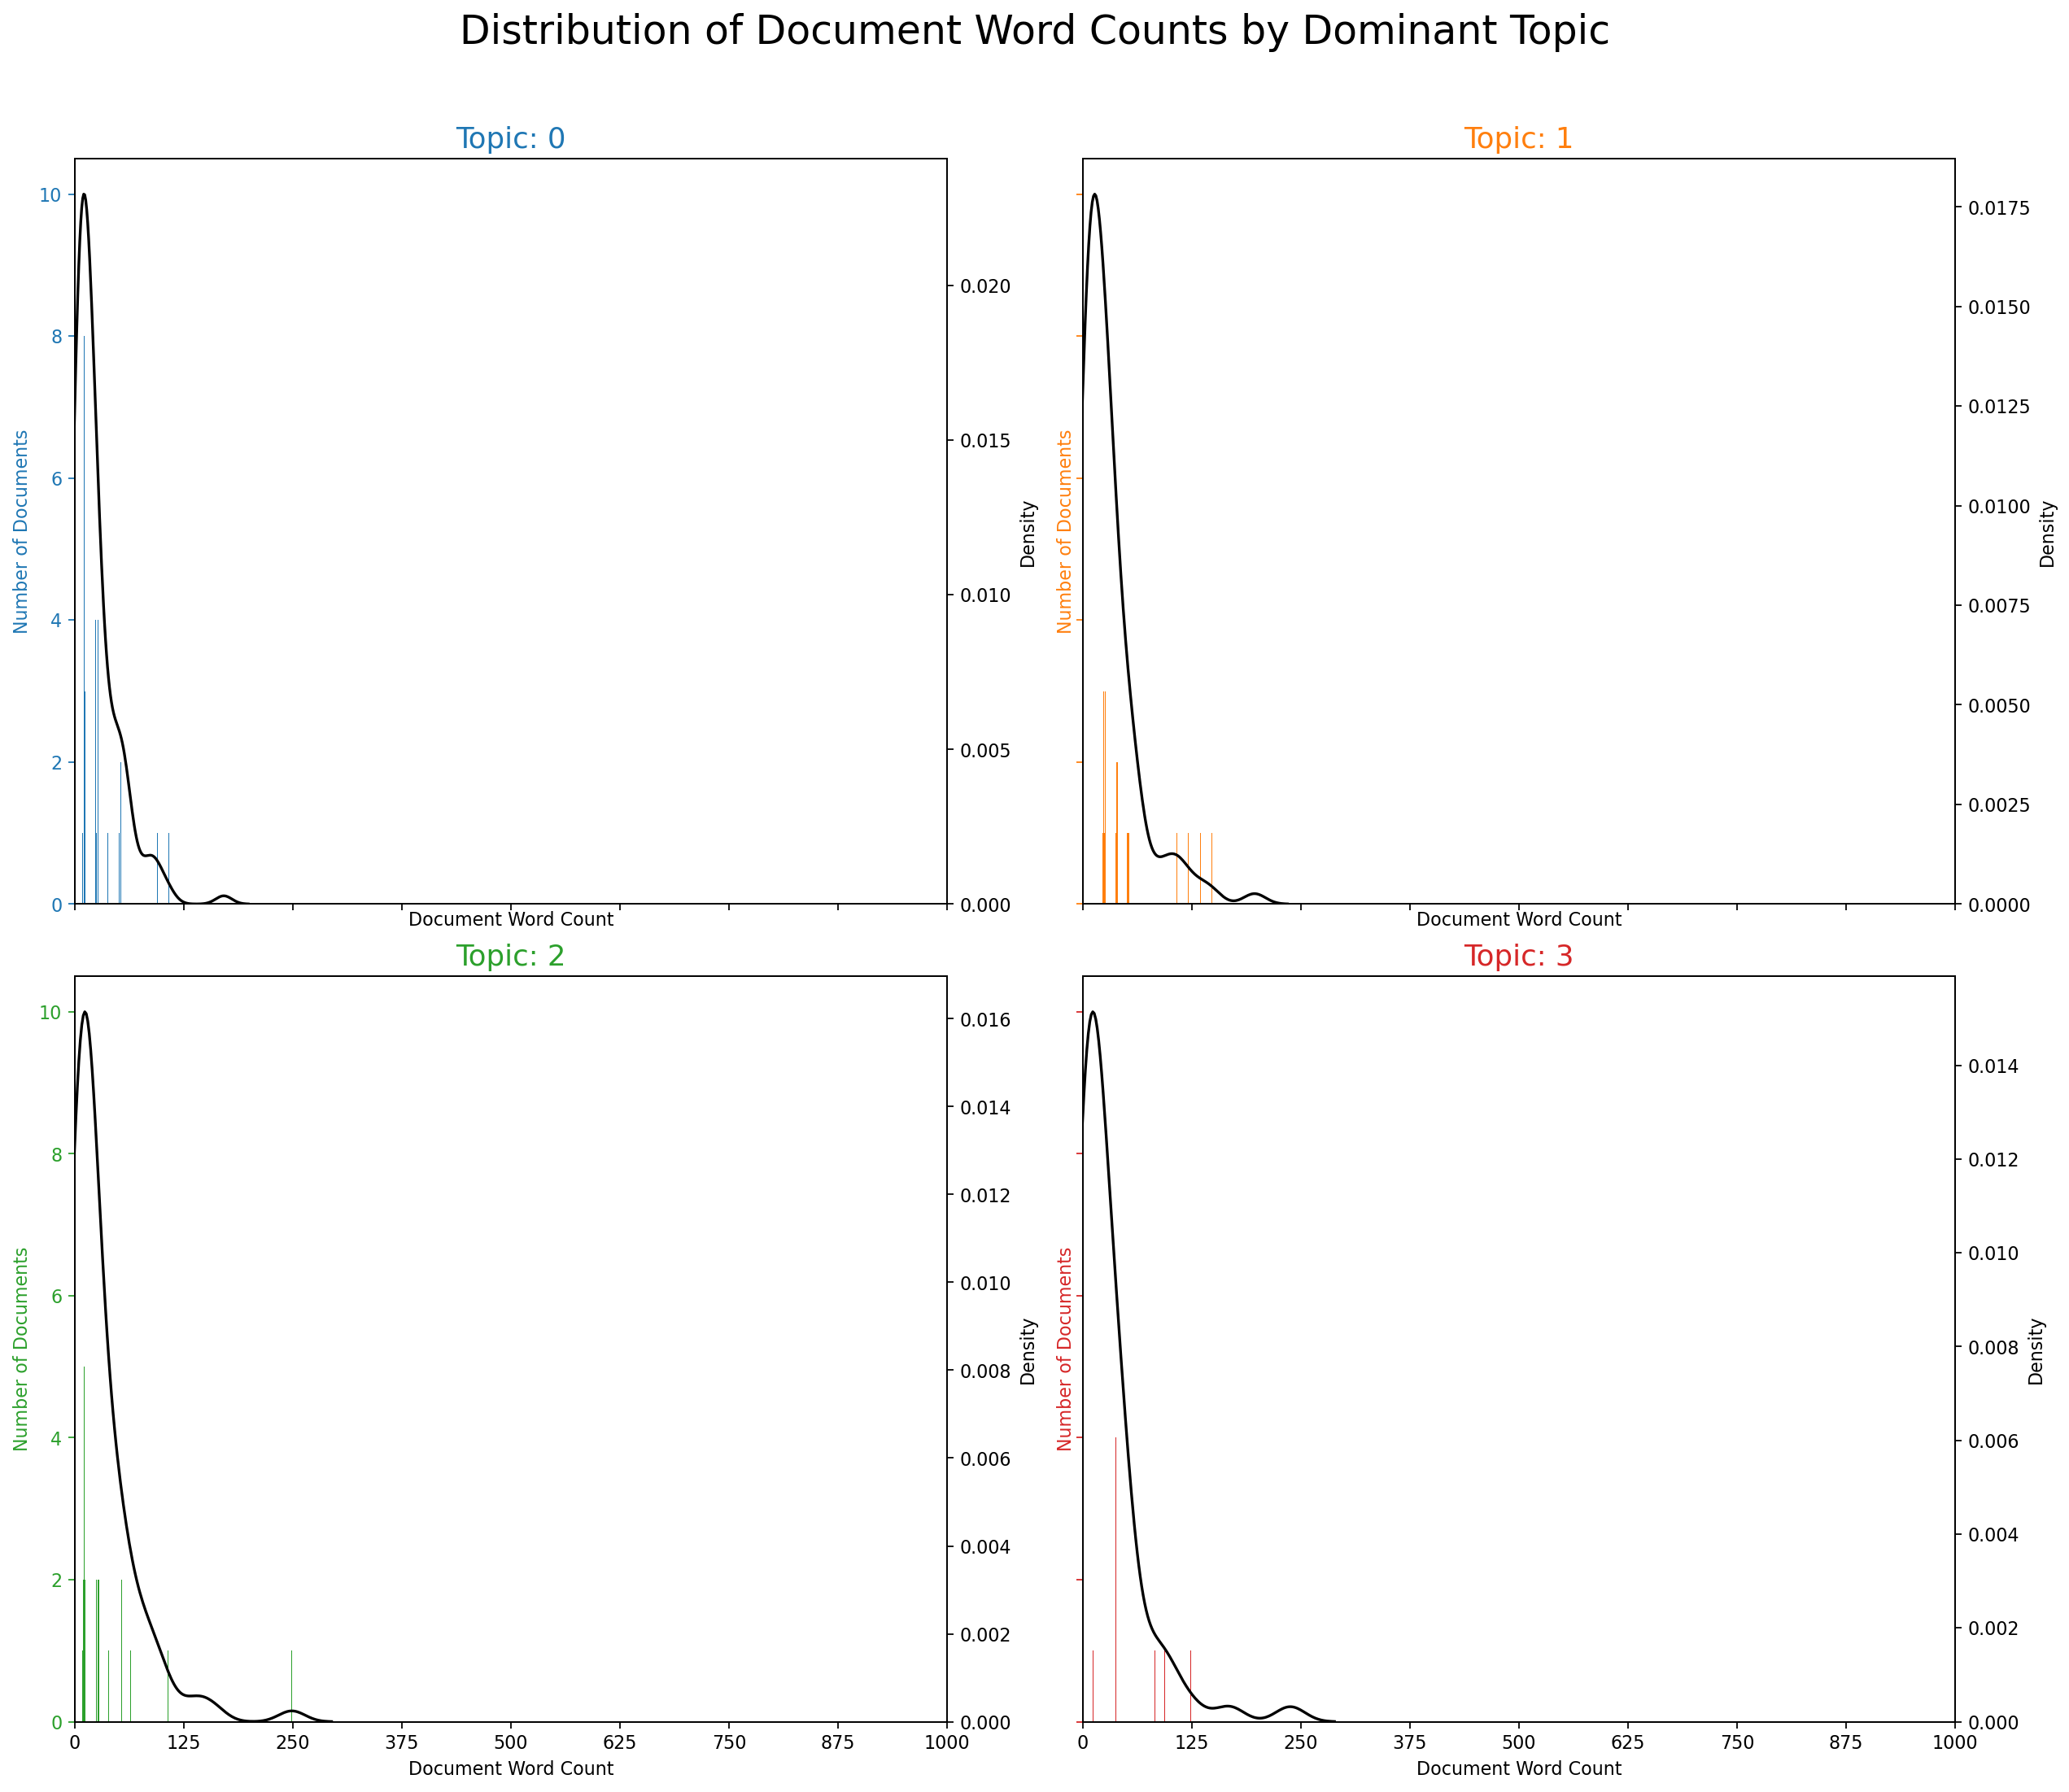

In [20]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 1000, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 1000), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

# Word Clouds of Top N Keywords in Each Topic

In [21]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more

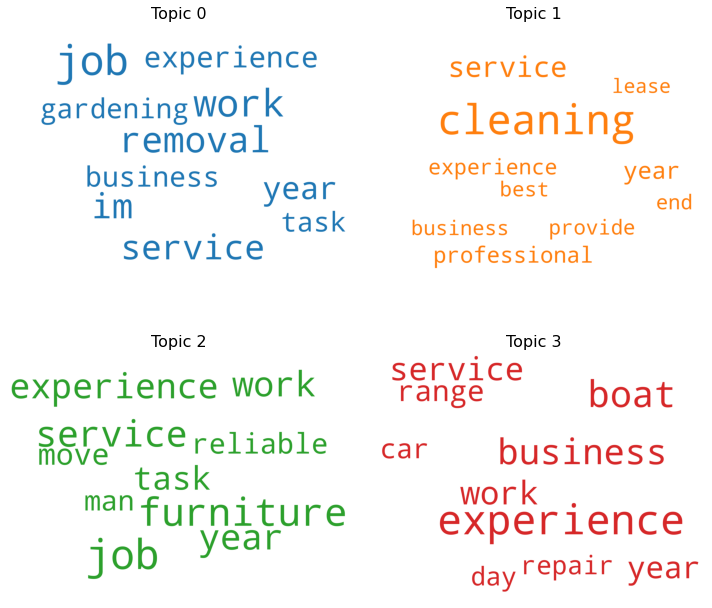

In [22]:
cloud = WordCloud(stopwords=stop,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(2, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

# word counts for topic keywords

<ipython-input-23-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-23-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-23-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
<ipython-input-23-9b6e6ec2de4a>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


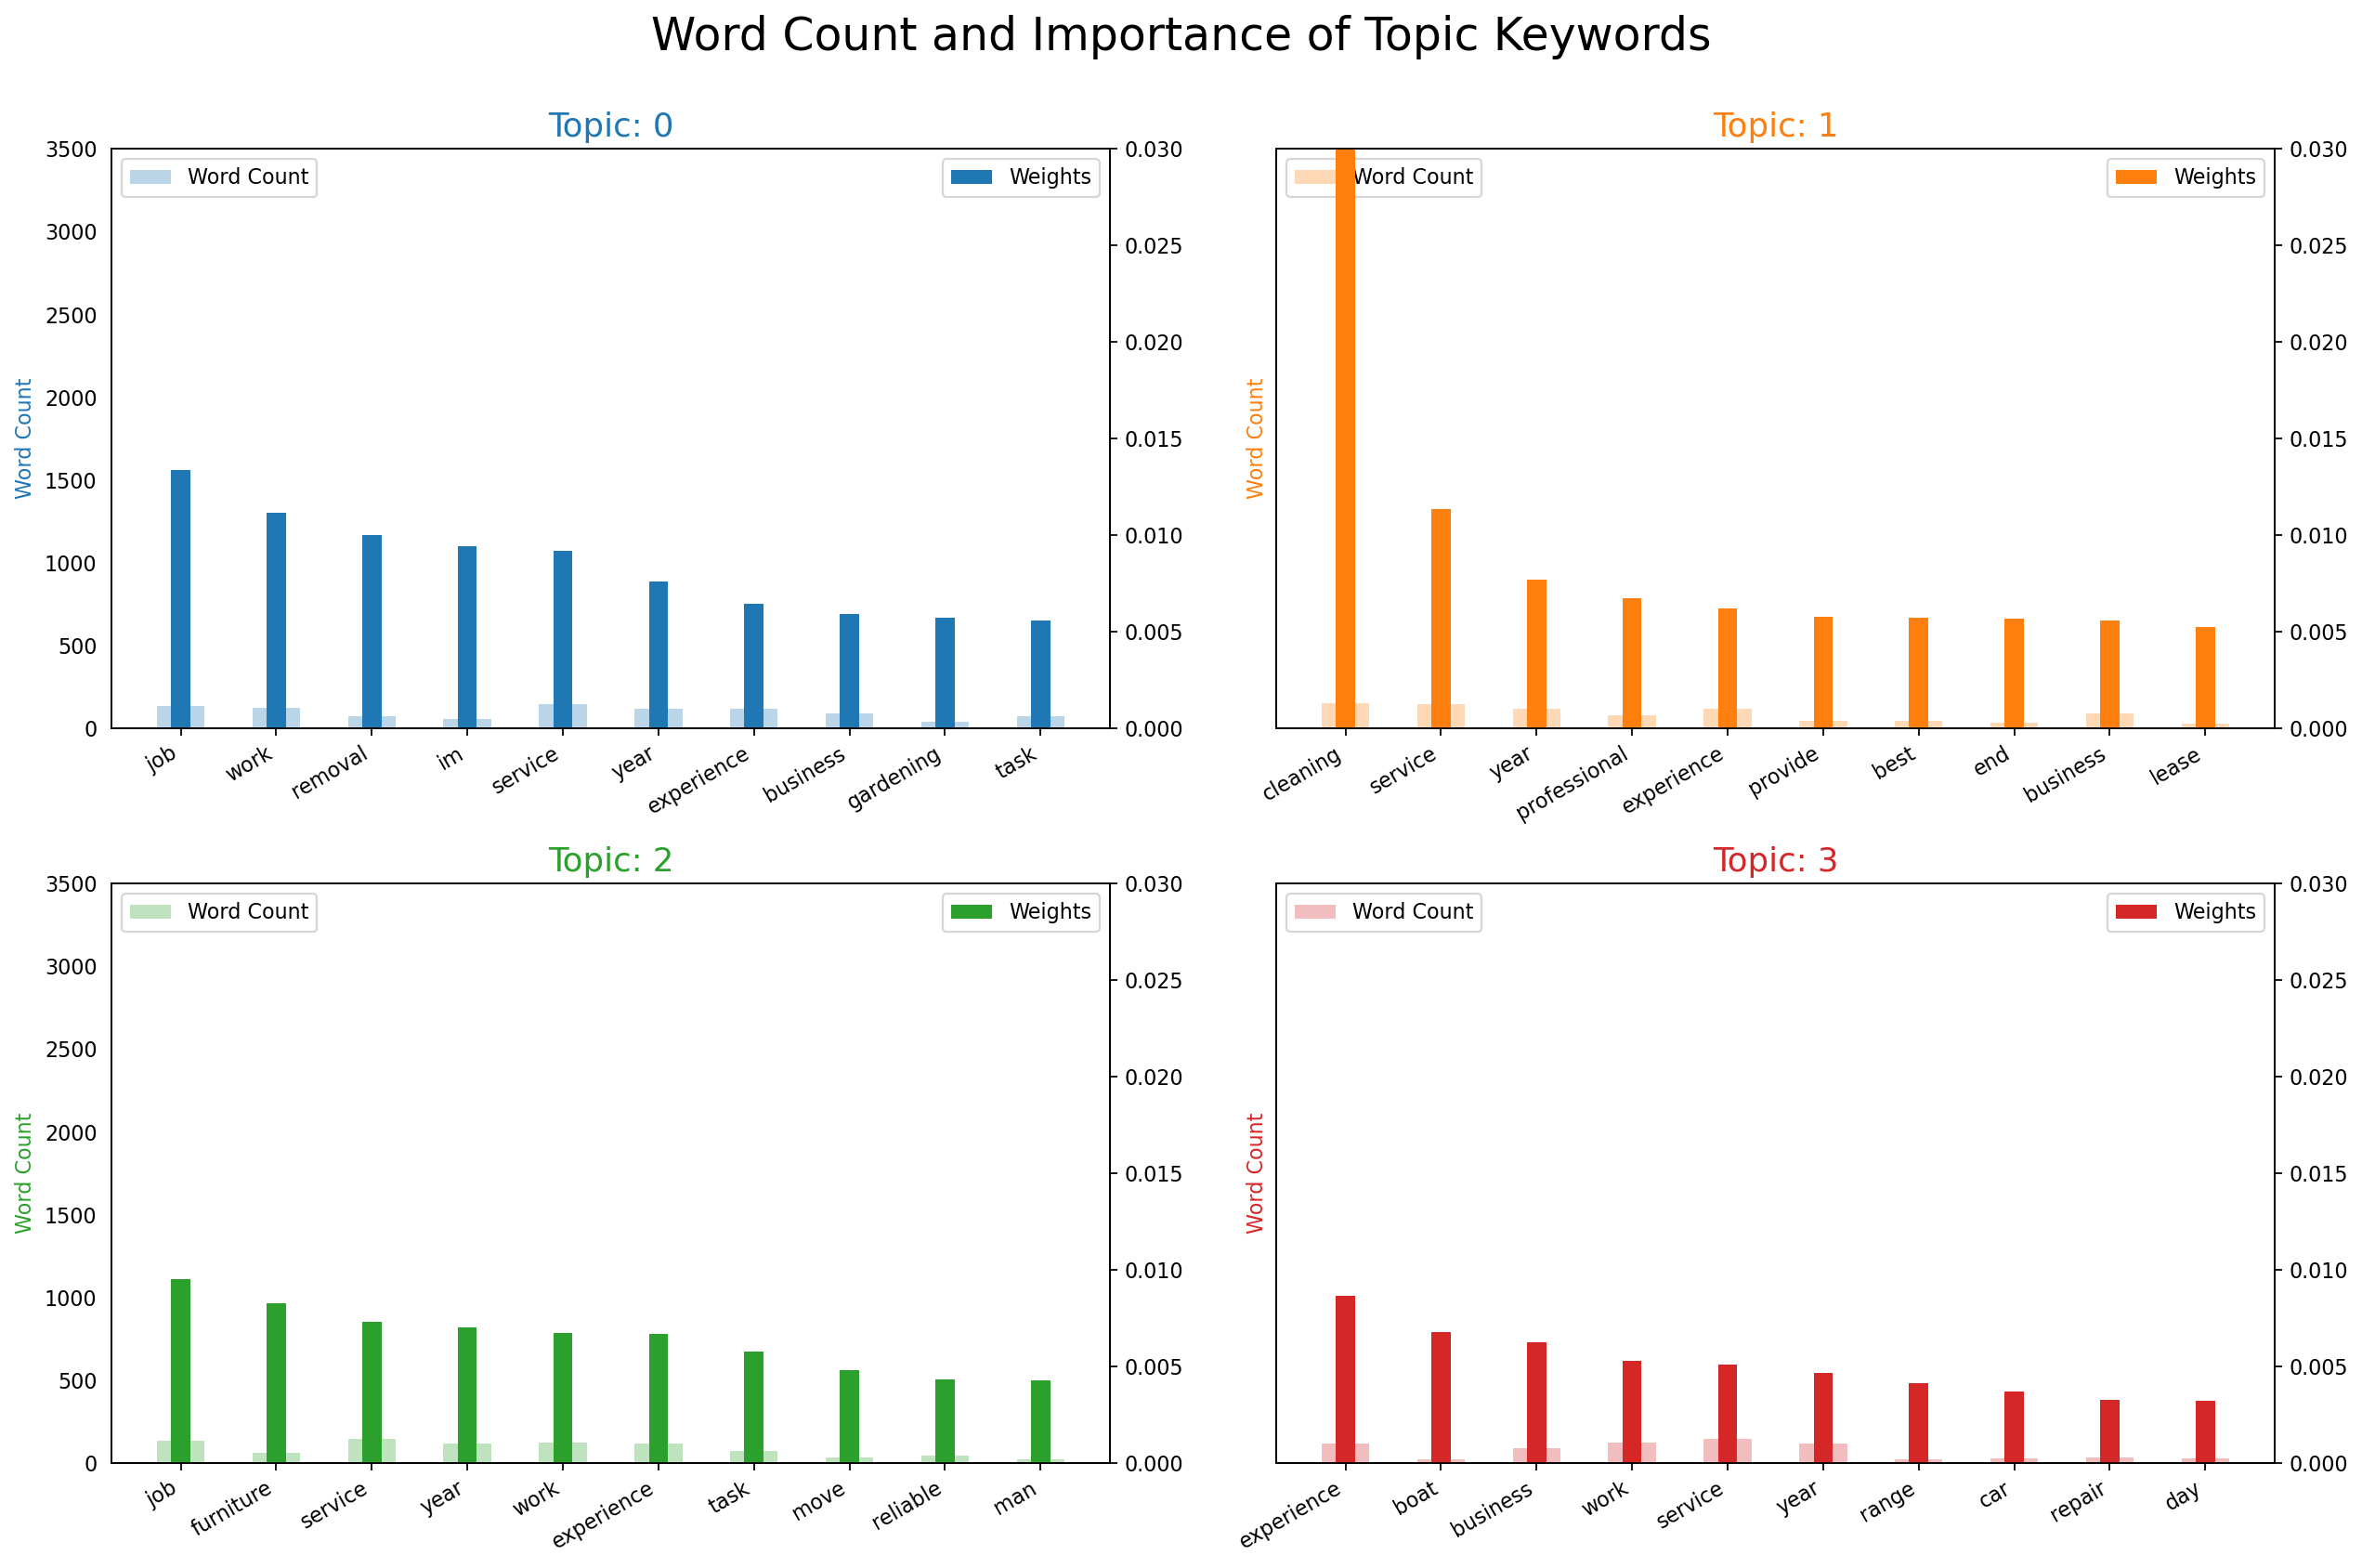

In [23]:
from collections import Counter
topics = ldamodel.show_topics(formatted=False)
data_flat = [w for w_list in doc_clean for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        


# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

# t-SNE Clustering Chart

In [37]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(ldamodel[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

TypeError: cannot unpack non-iterable int object

# pyLDAVis

In [24]:
import pyLDAvis.gensim_models


In [26]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(ldamodel, corpus, dictionary=ldamodel.id2word)
vis


/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.083711  0.053737       1        1  29.959843
1     -0.036171 -0.109202       2        1  28.165552
2     -0.005262  0.049020       3        1  24.745807
3      0.125143  0.006444       4        1  17.128798, topic_info=           Term        Freq       Total Category  logprob  loglift
4      cleaning  115.000000  115.000000  Default  30.0000  30.0000
10           im   43.000000   43.000000  Default  29.0000  29.0000
344        boat   16.000000   16.000000  Default  28.0000  28.0000
86      removal   55.000000   55.000000  Default  27.0000  27.0000
1017      lease   21.000000   21.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
14          new    5.248404   27.821720   Topic4  -6.0557   0.0965
636      client    5.086138   23.170906   Topic4  -6.0871   0.2480
585        team    4.947235   31.697941   Topic4  -6.1148  -0.0930
77    melbourne    4.882851   31.668554   Topic4  -6.1279  -0.1052
75          job    5.279258  102.728976   Topic4  -6.0499  -1.2039

[310 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2100      4  0.947690  15yrs
4220      4  0.947690   17ft
4221      4  0.947690   25ft
178       4  0.947690    4wd
60        1  0.276869      5
...     ...       ...    ...
21        4  0.109733   year
1030      1  0.772504     yr
4129      2  0.972807    ôå∂
1344      2  0.978325    ‚äì
3503      1  0.854704    ‚ôö

[510 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4])

In [ ]:
pyLDAvis.save_html(vis, 'ldano.html')

In [54]:
electric_data

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0      We are a small electrical business with decade...
1      Need a qualified electrician/heating and cooli...
2      Years in business: 36\nNumber of employees: 3\...
3      All types of Electrical Works\nIndustrial, Com...
6                               Contractor's Lic # 30614
                             ...                        
631    Over 30 years ICT experience. Cisco certified....
632    Hello,\nI have plenty of experience in DIY stu...
633    Hi I‚Äôm Jarrod. \nI am a refrigeration and ai...
634    I own a local, family owned electrical busines...
635    [Content Moderated] is a registered electrical...
Name: Description, Length: 615, dtype: object

In [40]:
def predict(new_text):
  if new_text is not None and str(new_text).strip() != '':
    cleaned_data = clean(new_text).split()
    bow_vector = dictionary.doc2bow(cleaned_data)
    filters = [lambda x: x.lower(), strip_punctuation, strip_numeric]
    for index, score in sorted(ldamodel[bow_vector], key=lambda tup: -1*tup[1]):
      res = preprocess_string(ldamodel.print_topic(index, 5), filters)
      return res
  else:
    return None

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
coherence_model_lda = CoherenceModel(model=ldamodel, 
                                     texts=doc_clean, 
                                     dictionary=dictionary, 
                                     coherence="c_v")
coherence_lda = coherence_model_lda.get_coherence()
print('\nLDA Coherence Score: ', coherence_lda)

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



LDA Coherence Score:  0.31759537134013094


In [44]:
coherence_model_lda

/Users/chenzhou/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
